# Portfolio Management - Coursework 2: Asset simulation and Liability Driven Portfolios

Welcome to Coursework 2! In this coursework you will dive deeper into portfolio construction,this time using the concepts of asset simulation and liability-driven portfolio management. Different to cw1, this implies start thinking about **investment strategies**.

This assignment is designed to practice all the concepts studied in this section of the course, and it is mainly build upon your foundational knowledge in mathematical finance, with a strong focus on practical application and critical analysis of portfolio management strategies. In particular, we will explore how to simulate asset returns, construct liability-driven portfolios, and analyze the alignment between asset performance and liability obligations.

Here's a breakdown of the topics you will cover:

1. Portfolio Management Basics:
  
  We use the foundational concepts in managing a collection of financial assets studied in the first part of the course, and in your previous courses in mathematical finance. The primary goal is to maximize returns while managing risks through diversification, asset allocation, and selection strategies.

2. Asset Simulation:
  You will explore asset simulation techniques, which are essential for predicting future asset values based on historical data, statistical models, or random processes. By simulating possible future outcomes, you will learn to assess potential portfolio performance under different scenarios.

3. Liability-Driven Investment (LDI):
  You will be introduced to strategies where investments are selected to meet specific future liabilities, such as pension payouts. LDI focuses on aligning assets with liabilities to minimize the risk of not meeting obligations. This approach is particularly relevant for institutions like pension funds, where cash flow alignment is crucial.

There are two types of exercises, those marked with letter **E** represent programmatic exercises that guide you to implement the concepts seen in class. And those marked with **R**, which are applications or extensions of the basic concepts studied in exercises **E** and are intended to be used for your report. Thus, your report must be based on exercises R, and to complete exercises R you need to complete exercises E.

Also, this coursework is structured in a progressive fashion, i.e. we use the results from each section for the next one, so that we end up combining all we see through the exercises. As such, you are also expected to write your report in this way, building up a general topic step by step, like telling a story. Try to build up progressively adding cocnepts and results.

Notice that the output of some E exercises is given so that you can check that your implementation is working as expected.

You are expected to:

1. Complete both types of exercises and write a report with your results and conclusions. If you have done your previous coursework many exercises should be easy to complete.

2. For the report you must include all the results from exercises R in a story-telling fashion. You need to explain what you are doing, why and how, and to interpret your results and describe what they mean the best you can and how they are related to other results and the general topic.The report is based in exercises R, and to do exercises R you need first to complete exercises E.

3. No code should be included in the main text of the final report, just include figures, tables, numbers, and your analysis of results and interpretations.

4. Figures and tables are required to have captions to understand what they represent, and when your refer to them on your report you need to indicate which number of Table, Figure, etc. you are refering to.

5. The notebook you have obtained with your code must be saved in pdf format and included as a separe file that serves as appendix for the report.

6. The final report must be less han 3500 words, and contain at the end the count of words. The report must be written in Latex but submitted just as pdf, together with the notebook with your code as pdf. This means that, at the end, you must submit ONLY TWO pdfs.

Any error to meet these conditions will make your work not considered for grading.

You may start now. Good luck!

## 1 CPPI

You already know how to build a portfolio. Now, we'll implement our first dynamic portfolio strategy called Constant Proportion Portfolio Insurance (CPPI), which balances growth potential with downside protection.

CPPI works by adjusting the portfolio's exposure to risky assets based on a "cushion," which is the difference between the portfolio's current value and a predefined floor (minimum acceptable level). Here's how it functions:

$\text{Investment in Risky Asset}=Multiplier×(Portfolio Value−Floor)$

- Define the Floor: Set a minimum value (floor) below which the portfolio should not fall. This could be based on specific needs or risk tolerance.

- Calculate the Cushion: The cushion is calculated as the difference between the current portfolio value and the floor. The cushion represents funds that can be invested in risky assets since it’s the amount the portfolio can "afford" to risk.

- Apply the Multiplier: A multiplier is used to determine how much of the cushion should be allocated to risky assets. For example, if the multiplier is 3 and the cushion is 100, then 300 would be allocated to risky assets.

- Adjust Portfolio Dynamically: As the portfolio's value changes, the cushion changes as well. The portfolio is rebalanced periodically to adjust the allocation between risky and safe assets according to the updated cushion.

When the portfolio performs well, the cushion grows, allowing for more investment in risky assets. Conversely, if the portfolio value falls, the cushion shrinks, prompting a shift toward safer assets to protect the floor. This approach maintains a balance between growth and protection, making CPPI a suitable strategy for investors seeking controlled risk exposure with a guaranteed minimum value.


#### Load data and libraries
As always strat by loading some libraries and data that would be useful for the practice.

In [ ]:
# Import libraries
# pandas
import pandas  as pd

# numpy
import numpy as np

# matplotlib.pyplot
import matplotlib.pyplot as plt


In [ ]:
#Load data industry returns
df_returns=pd.read_csv("index30_returns.csv", header=0, index_col=0,parse_dates=True)/100 #convert to percentages
df_returns.index=pd.to_datetime(df_returns.index,format="%Y%m").to_period('M') #to time series in monthly periods
df_returns.columns=df_returns.columns.str.strip() #remove blank spaces in names

<ipython-input-9-832b9b071bf2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_returns=pd.read_csv("ind30_m_vw_rets.csv", header=0, index_col=0,parse_dates=True)/100 #convert to percentages


##### **E1. Load the total market index size and industry firms. Give time series format in monthly periods. Note: Do not transform to percentages.**

In [ ]:
#Load the total market index
#get earnings sizes from the companies for each industry
df_index_size=pd.read_csv("index30_size.csv", header=0, index_col=0,parse_dates=True)
df_index_size.index=df_index_size.index.to_period()
df_index_size.columns=None

#get number of firms in the index of each industry
df_index_firms=None
None
None

Now, you have the number of firms in industry for this market, and the average firm size for each of these industries at different periods. You will calculate the market capitalization for each industry and determine the overall market return based on weighted capitalization.

Market capitalization represents the total value of each industry. Understanding each industry's market cap helps determine its influence in the overall market. It is computed as follows:

$\text{Industry Market Cap}_i=\text{Number of Firms in Industry}_i*\text{Average Firm Size}_i$

The sum of the Industry Market Capitalization returns the (Total) Market Capitalization, which is the size of the market at each period.

And, by dividing the capitalization of each industry by the market capitalization we obtain the weighted capitalization. Capitalization weight indicates how much each industry contributes to the overall market. This is essential for calculating a weighted market return that reflects each industry's relative importance.

Once you have these quantities, you can compute the total market return as a weighted average of individual industry returns. This is:

$\text{Total Market Return}=∑_i(\text{Capitalization Weight}_i*\text{Industry Return}_i)$


##### **E2. Calculate Market Capitalization and Weighted Market Return**

In [ ]:
#market capitalization
ind_mktcap=None
total_mktcap=ind_mktcap.sum(axis="columns")

#weighted capitalization
ind_capweight=ind_mktcap.divide(None,axis="rows")

#returns from market indez and industry returns
total_market_return=(None).sum(axis="columns")

For the following, consider just the returns for Steel, Finance, and Beer industries from 2000 onwards. These industries will form our risky assets.

In [ ]:
#Select specific industries as risky assets and create a safe asset with fixed monthly returns.
#Consider returns from 2000 for steel, fin, and beer
df_risky=None

We also need safe assets. For this, we create a dataframe with the same number of returns and assume a monthly fixed safe return of 0.02 annualized. This is, we have a risk-free asset that pays 0.02 per year.

In [ ]:
df_safe = pd.DataFrame().reindex_like(df_risky)
df_safe[:] = 0.02 / 12  # Monthly fixed safe return (2% annualized)

As we have risky and risk-free assets, let's implement CPPI and explore how it works. First, assume we invest 1000 USD, that the floor (the minimum value below which the portfolio should not fall) is 80% of the initial value, and that the multiplier (the level of exposure to risky assets based on the cushion, i.e. the aggressiveness of risky asset allocations) is 3.

In [ ]:
#Set up initial account parameters:
start = None  # Starting account value
floor = None  # Floor as a percentage of starting account, this is just a percentage
account_value = start #starting value of the investment
floor_value = start * floor #floor applied to the account value
m = None  # CPPI multiplier

CPPI works through out time, thus we need to define an entity to save the results of our simulated example. For this, we use dataframes of with the same number of trading periods than our risky assets, which are the number of steps for the simulation. As we are interested in tracking the evolution of portfolio values, risky and safe allocations, and total returns over time, we are going to define 3 dataframes.

In [ ]:
# Prepare to track the evolution of account values
dates = df_risky.index
n_steps = len(dates)

# Prepare trackers for the the history of account values, cushion, and risky weights
account_history = pd.DataFrame().reindex_like(df_risky)
cushion_history = pd.DataFrame().reindex_like(df_risky)
risky_w_history = pd.DataFrame().reindex_like(df_risky)


Awesome, according to the definition we have everything we need to simulate a CPPI strategy. The following code implements CPPI with a loop that adjusts the portfolio's allocation between risky and safe assets dynamically based on changes in the portfolio value and cushion, aiming to grow the portfolio while maintaining a minimum guaranteed level (floor). This implies:

1. Calculate the cushion:
  $\text{Cushion=(Portfolio Value−Floor)/Portfolio Value}$
2. Allocation Weights for the Risky Asset:
  $\text{Risky Investment Weights=Multiplier×Cushion}$
3. Allocation Weights for the Safe Asset: Any remaining funds are allocated to the safe asset.
4. Allocate money to assets: Apply the weights to the current account value.
5. Update the account value.

$\text{New Portfolio Value=(Allocation to Risky×(1+Risky Return))+(Allocation to Safe×(1+Safe Return))}$




Remember, our defined parameters allow you to control the level of risk and protection within the CPPI strategy. The floor ensures downside protection, while the multiplier allows growth by dynamically allocating more to risky assets when the portfolio performs well.

Caution: The loop saves the values being tracket to the dfs we defined to track them, so if you run the loop completely it would change the values saved.


##### **E3. Implement CCPI**



In [ ]:
#This loop performs the CPPI calculations by updating allocations based on the cushion. Use your defined strating parameters
for step in range(n_steps):
    # Calculate the current cushion
    cushion = None

    # Calculate weights for allocation to risky assets based on multiplier
    risky_w = None

    # Ensure allocation to risky does not exceed portfolio value and there
    # is no short selling
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)

    # Compute weights for the safe assets
    safe_w = None

    # Allocate the money in the acount to the risky and safe assets
    risky_alloc = None
    safe_alloc = None

    # Update account value based on risky and safe returns
    account_value = risky_alloc * (1 + df_risky.iloc[step]) + safe_alloc * (1 + df_safe.iloc[step])

   # Store the portfolio value and allocations (for visualization or tracking)ry of allocations
    cushion_history.iloc[step] = cushion
    account_history.iloc[step] = account_value
    risky_w_history.iloc[step] = risky_w

In [ ]:
#First values of our CCPI
account_history.head()

,Steel,Fin,Beer
2000-01,984.046667,974.146667,986.986667
2000-02,1022.532887,930.544355,922.400967
2000-03,1046.423637,996.806099,923.803661
2000-04,1040.725683,972.390635,938.392240
2000-05,1005.725487,999.318231,988.545742


Before seeing the effects of CPPI strategy, what would have happened if we had put all the money in the risky assets and not using the CPPI? Well, this is basically the cumulative returns of the risky assets:

In [ ]:
#Plot the account history for one asset, comparing CPPI-managed wealth with a fully risky allocation strategy.
risky_wealth = start * (1 + df_risky).cumprod()
risky_wealth.plot()

But, what is the investment allocation recommended using CPPI? Well, we can know this by plotting our simulated weights.

In [ ]:
risky_w_history.plot()

This is the evolution of the allocation to risky assets. Notice the increment in investment on beer. Let's compare then the CPPI vs Full Risky Allocation to beer:

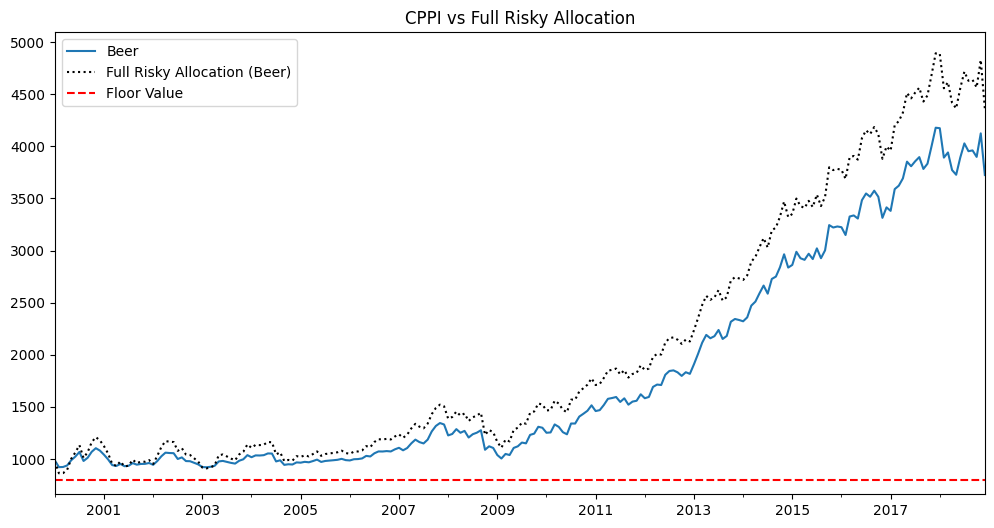

In [ ]:

# Plot CPPI-managed wealth vs. full-risky strategy for comparison
ax = account_history["Beer"].plot(figsize=(12, 6), title="CPPI vs Full Risky Allocation")
risky_wealth["Beer"].plot(ax=ax, style="k:", label="Full Risky Allocation (Beer)")
plt.axhline(y=floor_value, color='r', linestyle="--", label="Floor Value")  # Plot the floor line
plt.legend()
plt.show()

What can you observe?

Notice that allocation to beer increased, and we are far away from the floor. The no CPPI had more volatility. In practice, we would had incresed the floor, as we are far away from it, otherwise we are very conservative.

#### **E4. Compare CPPI vs Risky Allocation for Finance and Steel**

In [ ]:
#Finance
None

Here the effect of CPPI is more cleared, as in 2009 the allocation was really good, we had no violation and we had protection when the market crashed, the defect was that when the market rose we didn't enjoy all the upside benefit.

In [ ]:
#Steel
None

To further analyze this, we are going to make use of our previous risk-returns metrics from cw1. Namely, annualized returns, annualized volatility, skewness, kurtosis, Cornish-Fisher VaR, Historic VaR, CVaR, Sharpe Ratio, and Max Drawdown.

##### **E5. Compute the summary statistics studied in CW1 and apply them to df_risky**

In [ ]:
def summary_stats(r):
    """
    Calculate summary statistics for returns.
    Includes annualized return, volatility, skewness, kurtosis, VaR, CVaR, Sharpe ratio, and max drawdown.
    """
    # Calculate annualized return using compounded growth
    compounded_growth = (1 + r).prod()
    n_periods = r.shape[0]
    ann_r = None

    # Annualized volatility
    ann_vol = None

    # Skewness and kurtosis
    skew = None
    kurt = None

    # Value at Risk (5%) using Cornish-Fisher expansion
    z = 1.645  # Z-score for 5% VaR
    cf_var5 = None

    # Historical VaR (5%)
    hist_var5 = -r.quantile(0.05)

    # Conditional Value at Risk (CVaR)
    cvar5 = None

    # Sharpe Ratio assuming a risk-free rate of 0 for simplicity
    sharpe_ratio = ann_r / ann_vol.replace(0, np.nan)  # Avoid division by zero by replacing 0 with NaN

    # Maximum drawdown
    cumulative = None #cumulative return
    peak = cumulative.cummax()
    max_dd = ((cumulative / peak) - 1).min()

    # Compile results into a DataFrame
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR(5%)": cf_var5,
        "Historic VaR(5%)": hist_var5,
        "CVar(5%)": cvar5,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_dd
    })




In [ ]:
# Display summary statistics for risky assets
summary_stats(df_risky)

#Note: The values for Steel are:
#Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR(5%)	Historic VaR(5%)	CVar(5%)	Sharpe Ratio	Max Drawdown
#Steel	-0.002790	0.312368	-0.328499	1.196664	-0.480687	0.140580	0.208117	-0.008931	-0.758017

Great. You have already implemented CPPI and metrics to evaluate investment strategies. It is time to transform our strategy into a function that we can use whenever we want.

##### **E6. Implement CPPI as a function**



In [ ]:
def run_cppi(risky_r,safe_r=None,m=3,start=1000,floor=0.8,riskfree_rate=0.03): #this is not an exercise, dont change this line
    """
    Returns a basket of the CPPI strtaegy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky weight history
    """
    #set up the parameters
    dates=None
    n_steps=None
    account_value=None
    floor_value=None

    #Check you are given correct data
    if isinstance(risky_r,pd.Series):
        risky_r=pd.DataFrame(risky_r,columns=["R"])

    #this considers no risk free asset
    if safe_r is None: #this is not an exercise, dont change this line
        safe_r=pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:]=riskfree_rate/12

    #Now we set up no needed values for CPPi just for tracking the evolution of our variables
    account_history=pd.DataFrame().reindex_like(risky_r)
    cushion_history=pd.DataFrame().reindex_like(risky_r)
    risky_w_history=pd.DataFrame().reindex_like(risky_r) #weights of the risky asset

    #CPPI implementation
    for step in range(n_steps):
        cushion=None
        risky_w=None
        risky_w=None #usually we want to limit the allocation to the risky asset
        risky_w=np.maximum(risky_w,0) #no short selling
        safe_w=None
        #Allocation:
        risky_alloc=None
        safe_alloc=None
        #Update the account value for this time step:allocation in risky asset times it's return for that time, plus the same for the safe asset
        account_value=None

        #CPPI is done, we now look at the history and plot it
        cushion_history.iloc[step]=None
        account_history.iloc[step]=None
        risky_w_history.iloc[step]=None
        risky_wealth=start*(1+risky_r).cumprod()

    #now we pack all our backtest info into a dictionary
    backtest_result={
                "Wealth": account_history,
                "Risky Wealth": risky_wealth,
                "Risk Budget": cushion_history,
                "Risky Allocation": risky_w_history,
                "m":m,
                "start":start,
                "floor":floor,
                "risky_r":risky_r,
                "safe_r":safe_r
            }
    return backtest_result


Apply CCPI to our df_risky and compute the summary statistics.

In [ ]:
# Run CPPI
btr = run_cppi(df_risky)

#As CPPI returns account value, we need to compute returns:
summary_stats(btr["Wealth"].pct_change().dropna())

#Note, for steel you should obtain
#Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR(5%)	Historic VaR(5%)	CVar(5%)	Sharpe Ratio	Max Drawdown
#Steel	-0.005167	0.174180	-2.008439	14.452894	-0.029848	0.068080	0.130153	-0.029666	-0.655198

Compare the stats with and without applying CPPI.



You may have notice that CPPI introduces protection in the downside. Thus, we can improve our algorithm by introducing a more elaborated downside protection, for example, by using a drawdown constrain. Introducing a drawdown constraint limits the portfolio's risky asset exposure to prevent excessive losses. This enhances the CPPI strategy's effectiveness by dynamically adjusting risk-taking based on portfolio performance relative to the floor


With a drawdown
constraint our floor is not a static value anymore, but a dynamic value that changes over time. And the floor is updated with respect to the last peak we have seen.

##### **E7. Update CPPI to introduce the drawdown constrain**

In [ ]:
def run_cppi(risky_r,safe_r=None,m=3,start=1000,floor=0.8,riskfree_rate=0.03,drawdown=None): #this is not an exercise, dont change this line
    """
    Returns a basket of the CPPI strtaegy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky weight history
    """
    #set up the parameters
    dates=None
    n_steps=None
    account_value=None
    floor_value=None
    peak=start #at the start, the start value is our peak

    if isinstance(risky_r,pd.Series):
        risky_r=pd.DataFrame(risky_r,columns=["R"])


    if safe_r is None: #this is not an exercise, dont change this line
        safe_r=pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:]=riskfree_rate/12

    #Now we set up no needed values for CPPi just for tracking the evolution of our variables
    account_history=None
    cushion_history=None
    risky_w_history=None #weights of the risky asset

    for step in range(n_steps):
        #If there is no constrain, the peak value is just the
        #maximum between the peak and account value
        if drawdown is not None: #this is not an exercise, dont change this line
            peak=np.maximum(peak,account_value)
            floor_value= peak*(1-drawdown) #Our floor is with respect to the peaks

        cushion=None
        risky_w=None
        risky_w=None #usually we want to limit the allocation to the risky asset
        risky_w=None #no short
        safe_w=None

        #Allocation:
        risky_alloc=None
        safe_alloc=None

        #Update the account value for this time step:allocation in risky asset times it's return for that time, plus the same for the safe asset
        account_value=None

        #CPPI is done, we now look at the history and plot it
        cushion_history.iloc[step]=None
        account_history.iloc[step]=None
        risky_w_history.iloc[step]=None
        risky_wealth=None #risky allocation

    #now we pack all our backtest info into a dictionary
    backtest_result={
                "Wealth": account_history,
                "Risky Wealth": risky_wealth,
                "Risk Budget": cushion_history,
                "Risky Allocation": risky_w_history,
                "m":m,
                "start":start,
                "floor":floor,
                "risky_r":risky_r,
                "safe_r":safe_r
            }
    return backtest_result


Now, apply CPPI to the returns from 2007 with a drawdown constrain of 0.25, and compute the summary statistics.

In [ ]:
btr=run_cppi(df_returns["2007":][["Steel","Fin","Beer"]],drawdown=0.25)
ax=btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax,style="--",label="Total Market Risky Wealth")
plt.legend()
plt.show()

In [ ]:
summary_stats(btr["Risky Wealth"].pct_change().dropna())
#Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR(5%)	Historic VaR(5%)	CVar(5%)	Sharpe Ratio	Max Drawdown
#Steel	-0.039660	0.306407	-0.464841	1.889933	-0.406983	0.13198	0.203837	-0.129435	-0.758017

In [ ]:
summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR(5%),Historic VaR(5%),CVar(5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.445778,2.343283,-0.144744,0.043444,0.066991,0.038979,-0.248059
Fin,0.041975,0.085028,-0.358939,1.238406,-0.172197,0.038201,0.054111,0.493656,-0.243626
Beer,0.084375,0.086263,-0.752023,1.671059,-0.198224,0.031027,0.051189,0.978113,-0.161186


As you can see there's an important dif
ference in the Drawdowns. Now, this was because we were updating the
floor every month, in practice you would want to save trading costs, so there are other tools that can be added to
this.

Another question is, what happens when we vary the drawdown constrain level?

##### **R1. Choose three industries and perform a risky allocation strategy. Analyze the risk-return statistics of this strategy. Apply CPPI without drawdown constrain. Analyze the evolution of the weights and cushion and explain what you see. Analyze the protection of CPPI to downside risk. Is there any relevant protection or oportunity cost identified? Analyze the risk-return. Apply CPPI with 10%, 20%, and 30% of drawdown constrain. Calculate summary statistics for each of these different drawdown constraints to see how they influence the CPPI strategy’s risk-return profile. Analyze the results fo the strategy, explain how they influence the CPPI strategy’s risk-return profile. Finally, explain the results and compare the five portfolio allocation strategies you have created. Which one would you recommend for each industry and why? Explain any interesting observation, the effect of CPPI, its pros and cons and the effect of the drawdown constrains.**



This completes a thorough analysis of the CPPI strategy with drawdown constraints, applied to different assets, including the total market index. This allows you to compare how each asset class behaves under varying levels of risk control, helping you to make informed conclusions about the effectiveness of CPPI in diverse market conditions.

## 2 Random Walks and Asset Simulation

So far our portfolio constructions and strategies have been based on backtesting, i.e. we implemented all these techniques to past values to see what would had happened if we had used these strategies. But when dealing with investment portfolios the real question is not what would had happened but what will happen, because investing is not just about backward analysis but also about forward predictions. For example, CPPI is not valuable for the protection it could had given but for the protection it gives us for future downside risks. Thus, the task is now how to apply these strategies for future movements in assets.

Geometric Brownian Motion is widely used to model the evolution of assets and stock prices over time. In this model, the stock price $S_t$ at time $t$ is given by:

$$
S_t = S_0 \cdot \prod_{i=1}^{t} (1 + r_i)
$$

where:
- $S_0$ is the initial stock price,
- $r_i$ is the return at each time step i,
- and the product is taken over each incremental return up to time t.

The returns $r_i$ are typically assumed to follow a normal distribution, which allows us to model randomness in stock prices. Specifically:

$$
r_i = \mu \cdot \Delta t + \sigma \cdot \sqrt{\Delta t} \cdot \xi_i
$$

where:
- $\mu$ is the expected (average) return of the stock,
- $\sigma$ is the volatility (standard deviation) of the stock returns,
- $\Delta t$ is the time increment (e.g., $\frac{1}{12}$ for monthly steps),
- $\xi_i$ is a standard normal random variable, $\xi_i \sim N(0, 1) $\, representing randomness in the return.

Thus, to implement the GBM model you need to define this questities, simulate a normal variable and then just apply the formula.

##### **E8. Implement GBM**




In [ ]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using GBM (Geometric Brownian Motion)
    """
    dt = None #step size
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))  # Generate random returns
    rets = None  # Apply the GBM to calculate returns for each step
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()  # Calculate prices by cumulative product
    return prices

Now, generate 3 scenarios for a stock price for 10 years.

In [ ]:
# Generate sample data with gbm0
p = gbm0(n_years=10, n_scenarios=3)
print(p.head())

# Plot the results
p.plot(figsize=(12, 6),legend=False)
plt.title("Geometric Brownian Motion (Basic Implementation)")
plt.show()

##### **E9. Simulate 100 scenarios for 10 years.**

In [ ]:
None

The following section is optional and not neccesary for the essential results of the following section, however, you are encouraged to solve it.

##### Optimized Formulation and Interactive Simulation (OPTIONAL)

In our optimized GBM function, we calculate returns directly in a way that avoids explicit loops. We generate values for \( $1 + r_i$ \) using:

$$
1 + r_i = 1 + \mu \cdot \Delta t + \sigma \cdot \sqrt{\Delta t} \cdot \xi_i
$$

This can be generated directly using:

$$
\text{rets_plus_1} = \text{np.random.normal}(\text{loc}=1 + \mu \cdot \Delta t, \text{scale}=\sigma \cdot \sqrt{\Delta t}, \text{size}=(\text{n_steps}, \text{n_scenarios}))
$$

Here:
- **loc** (mean) is set to \( $1 + \mu \cdot \Delta t$ \),
- **scale** (standard deviation) is set to \( $\sigma \cdot \sqrt{\Delta t}$ \).

The stock prices \( $S_t$ \) for each scenario are then computed as the cumulative product of these adjusted returns:

$$
S_t = S_0 \cdot \prod_{i=1}^{t} \text{rets_plus_1}_i
$$

This approach efficiently models the evolution of stock prices over time, capturing both the drift (expected return) and the volatility.

The next function, gbm, is an optimized version of gbm0, which uses vectorization for faster computation. Instead of calculating returns and adding 1 to each element in a loop, it directly generates the adjusted return values.

In [ ]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Optimized Evolution of a Stock Price using GBM
    """
    dt = None
    n_steps = None
    rets_plus_1 = np.random.normal(loc=1 + mu * dt, scale=sigma * np.sqrt(dt), size=(n_steps, n_scenarios))
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()  # Optimized cumulative product calculation
    return prices

In [ ]:
# Apply the optimized GBM function
p_optimized = gbm(n_years=10, n_scenarios=100)

# Plot the optimized results
p_optimized.plot(figsize=(12, 6), legend=False)
plt.title("Optimized Geometric Brownian Motion")
plt.show()

If the improvement is not clear, run the following cell to compute the time it takes to run each GBM implementation.

In [ ]:
# Compare performance
%timeit gbm0(n_years=5, n_scenarios=1000)
%timeit gbm(n_years=5, n_scenarios=1000)

The last refinement ensures that the simulated stock prices start exactly at the initial value s_0 for all scenarios by setting the first row to 1 in rets_plus_1.

In [ ]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Final Evolution of a Stock Price using GBM, ensuring initial value starts at s_0.
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=1 + mu * dt, scale=sigma * np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1  # Start all scenarios at s_0
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [ ]:
gbm(n_years=10,n_scenarios=1000).plot(legend=False)

Now, we can use GBM to simulate assets and then apply CPPI.

##### **E10. Define a function show_cppi to run a Monte Carlo simulation of the CPPI strategy. This function uses simulated risky asset returns generated by the gbm function assuming an initial investment of 100. For the simulation, use n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03**

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100):
    """
    Plots the result of a Monte Carlo Simulation of CPPI, including a histogram of terminal wealth.
    """
    start = None
    sim_rets = gbm(None)
    risky_r = pd.DataFrame(sim_rets.pct_change().dropna())

    # Run CPPI back-test
    btr = run_cppi(risky_r=None, riskfree_rate=None, m=None, start=None, floor=floor)
    wealth = btr["Wealth"]

    # Calculate terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]

    # Plot wealth evolution and terminal wealth histogram
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    # Plot wealth evolution
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred") #dont change this line
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start * floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    # Plot terminal wealth histogram
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    plt.title("Monte Carlo Simulation of CPPI Strategy with Terminal Wealth Distribution")
    plt.show()


In [ ]:
#Perform the simulation
None

##### **E11. Enhance show_cppi by including a histogram of terminal wealth at the end of the simulation. This histogram shows the distribution of outcomes across different scenarios. Also, include  additional statistics, such as mean, median, the probability of falling below the floor, and expected shortfall if the floor is violated.**

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100):
    """
    Plots the result of a Monte Carlo Simulation of CPPI, including terminal wealth stats.
    """
    start = None
    sim_rets = None
    risky_r = None

    # Run CPPI back-test
    btr = None
    wealth = None
    terminal_wealth = wealth.iloc[-1]

    # Calculate terminal wealth stats
    y_max = None
    tw_mean = terminal_wealth.mean() #compute mean
    tw_median = None #compute median
    failure_mask = terminal_wealth < start * floor #this shows when the floor was violated
    n_failures = None.sum() #sum the number of violations
    p_fail = None #the probability of violating the floor, which is the number of violation over the number of total scenarios
    e_shortfall = (terminal_wealth - start * floor)[failure_mask].mean() if n_failures > 0 else 0.0 #expected shortfall

    # Plot wealth evolution and terminal wealth histogram
    None

    # Plot wealth evolution
    None

    # Plot terminal wealth histogram
    None

    # Annotate statistics
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(0.7, 0.85), xycoords='axes fraction', fontsize=24)
    if floor > 0.01:
        hist_ax.axhline(y=start * floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:.2f}%)\nE(shortfall)=${e_shortfall:.2f}", xy=(0.7, 0.7), xycoords="axes fraction", fontsize=24)

    plt.show()


In [ ]:
#Apply the simulation

##### **R2. You are going to simulate returns and apply CPPI. First, explain how GBM is used and computed, and how it can be used into CPPI. Then, perform 5 different simulations of returns using GBM with different configurations for 1000 scenarios for periods of 40 years. Apply CPPI to the simulated returns. Plot a histogram of the terminal wealth at the end of the simulation. Also, include additional statistics, such as mean, median, the probability of falling below the floor (which is computed from the times the floor was violated during the simulations), and the expected shortfall if the floor is violated. Analyze the results and give some key conclusions about GBM usage for Portfolio Management and CPPI.**

## 3 Present Value of Liabilities and Funding Ratio

One of the main porpuses of investing is not just to get richier or grow the assets, but also to hedge the money you need to do the thing you want in the future.

The liability perspective of investment is an approach where the primary goal of the portfolio is to match or exceed the returns required to meet future liabilities rather than focusing solely on maximizing returns. This allows for Risk Management with Liabilities in mind.

One way to see at this from personal investments is to consider future money objectives as a debts, i.e. liabilities. Thus, as you may remember from financial mathematics, we can valuate in the present the money that we would need in the future to cover our liability. Therefore, the first step is to calculate the present value (PV) of a set of future liabilities and determine the funding ratio, which compares available assets to these liabilities.

For institutional investors, the funding ratio and liability perspective of investment are key concepts that introduce the Liability-Driven Investment (LDI) strategy, which is often used by institutions like pension funds and insurance companies to manage portfolios with a focus on meeting future financial obligations. By focusing on the funding ratio and liability alignment, they ensure that the portfolio is not only growing but also capable of fulfilling its primary purpose—meeting all future financial commitments.



---

**Discount Factor**

The price of a pure discount bond that pays $1 at time t, given an annual interest rate r, is calculated using the discount factor:

$$
B(t) = \frac{1}{(1 + r)^t}
$$

where:
- t is the time in years,
- r is the annual interest rate.

---

**Present Value of Liabilities**

The present value PV(L) of a set of liabilities is given by the sum of each liability $L_i$ due at time $t_i$, discounted by $B(t_i)$:

$$
PV(L) = \sum_{i=1}^k B(t_i) \cdot L_i
$$

where:
- $t_i$ is the time at which each liability is due,
- $L_i$ is the amount of the liability at $t_i$,
- r is the annual interest rate.

If the yield curve is flat (a single interest rate r applies for all times), this formula calculates the total present value of all liabilities.

---

**Funding Ratio**

The funding ratio compares available assets to the present value of liabilities. It is calculated as:

$$
\text{Funding Ratio} = \frac{\text{Assets}}{PV(L)}
$$

where:
- **Assets** is the amount of money available today to fund future liabilities,
- PV(L) is the present value of the liabilities.

A funding ratio greater than 1 indicates overfunding, while a value below 1 indicates underfunding.

---

**Analysis of Interest Rate Impact**

To analyze the impact of interest rate changes on the funding ratio:
- **Increasing the Interest Rate**: Lowers the present value of liabilities, as future cash flows are discounted more heavily, potentially increasing the funding ratio.
- **Decreasing the Interest Rate**: Raises the present value of liabilities, making the funding ratio worse if assets remain constant.

##### **E12. Implement fucntions to compute the the price of a pure discount bond, the PV of liabilities, and the funding ratio**

In [ ]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays $1 at time t,
    given an interest rate r.
    """
    None

To check the discount factor for a payment due in 10 years at a 3% interest rate

In [ ]:
discount(10, 0.03) #returns 0.7440939148967249

In [ ]:
def pv(liabilities, r):
    """
    Computes the present value of a set of liabilities.
    `liabilities` is indexed by the time, and values are the amounts.
    Returns the present value of the set.
    """
    None

Define a set of liabilities and calculate their present value with a 3% discount rate.

In [ ]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
pv(liabilities, 0.03)  # Returns 6.233320315080045

In [ ]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio given assets, liabilities, and interest rate.
    """
    None

To calculate the funding ratio with $5 in assets and a 3% interest rate

In [ ]:
funding_ratio(5, liabilities, 0.03)  # Returns 0.8021407126958777

To observe the effect of interest rate changes on the funding ratio, we can recalculate it with different rates. A drop in the interest rate generally lowers the funding ratio because liabilities’ present value increases when discounted at a lower rate.

In [ ]:
# Calculate funding ratio with interest rate of 2%
funding_ratio(5, liabilities, 0.02)  # Returns 0.7720304366941648

0.7720304366941648



##### **E13. Vary the interest rate and number of assets to see the effect**

You can see how different levels of assets and interest rates impact the funding ratio.

- Increasing Assets: Adding more assets improves the funding ratio.
- Improving the Rate of Return: A higher interest rate decreases the present value of liabilities, thus improving the funding ratio.
These options provide strategies to ensure future liabilities can be met.

As you may remember from financial mathematics, the most important element for liabilities valuation is the interest rate. In previous courses you may have studied liabilities with fixed interest rates, however, interest rate also vary. Therefore, for valuating future liabilities it is important to model interest rate movements. We already know how to simulate movements in returs, and interest rates are similar (from a debt owner perspective). However, we can go further and extend our study to another model that is extremely popular to model interest rates.

## 4 CIR Model for Interest Rates


The Cox-Ingersoll-Ross model is used to model the dynamics of interest rates, and is and extension of the popular Vasicek Model to prevent negative interest rates.

We have seen that the CIR is a mean reversion model that put the changes on interest rates as a function of how
far you are at time t from the long term mean, summed to some shock which is a function of the volatility times
the square root of the rate at time t (the Vasicek Model is the same without this square root), this square root
ensures that if the rate goes to zero also does the shock.


The dynamics of the interest rate \( $r_t$ \) under the CIR model are described by:

$$
dr_t = a(b - r_t) \, dt + \sigma \sqrt{r_t} \, dW_t
$$

where:
- \( $r_t$ \) is the interest rate at time \( t \),
- \( a \) is the speed of mean reversion,
- \( b \) is the long-term mean level of the rate,
- \( \sigma \) is the volatility,
- \( $dW_t$ \) is a Wiener process (random shock).

Again,the square root term \( $\sqrt{r_t}$ \) ensures that the interest rate does not become negative.

---

**Conversion Between Force of Interest and Annualized Rate**

We use the following conversions between the force of interest and the annualized rate:

- **Force to Annualized Rate**:
  $$ \text{force_to_ann}(r) = e^r - 1 $$

- **Annualized Rate to Force**:
  $$ \text{ann_to_force}(r) = \ln(1 + r) $$

These functions allow us to switch between different representations of the interest rate in the model.


---


##### **E14. Implement the conversions from and to force of interest and the CIR model to simulate interest rates movements.**


In [ ]:
def force_to_ann(r):
    """
    Converts force of interest to an annualized rate.
    """
    None

def ann_to_force(r):
    """
    Converts an annualized rate to the force of interest.
    """
    None


The cir function implements the Cox-Ingersoll-Ross (CIR) model, which simulates the evolution of interest rates over time.

In [ ]:
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for simulating interest rate evolution over time.
    """
    if r_0 is None: #dont change this line
        r_0 = b
    r_0 = None #transform r_0 to force of interest
    dt = None #step size
    num_steps = int(n_years * steps_per_year) + 1
    shock = None(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios)) #simulate normal variables with
    rates = np.empty_like(shock)
    rates[0] = r_0 #first rate

    for step in range(1, num_steps):
        r_t = rates[step - 1]
        d_r_t = None #simulate the rates movements using CIR
        rates[step] = abs(r_t + d_r_t)

    return pd.DataFrame(data=force_to_ann(rates), index=range(num_steps))


In [ ]:
#Apply the CIR model
cir(n_scenarios=10).plot(figsize=(12, 5), title="CIR Model Simulation of Interest Rates")
plt.show()


The model can also be used to generate the movement of bond prices for a zero coupon bond that are implied
by the generated interest rate.

**Zero-Coupon Bond Pricing with the CIR Model**

The CIR model also allows us to price a zero-coupon bond (ZCB) that matures at time T, given an initial rate r. The ZCB price P(t, T) is given by:

$$
P(t, T) = A(t, T) \cdot e^{-B(t, T) \cdot r_t}
$$

where:
- A(t, T) and B(t, T) are defined by the CIR parameters as follows:

  1. Compute h as:
     $$
     h = \sqrt{a^2 + 2 \sigma^2}
     $$

  2. Compute B(t, T) as:
     $$
     B(t, T) = \frac{2 \cdot (e^{h \tau} - 1)}{2h + (a + h) \cdot (e^{h \tau} - 1)}
     $$

  3. Compute A(t, T) as:
     $$
     A(t, T) = \left( \frac{2h \cdot e^{(h + a) \cdot \tau / 2}}{2h + (a + h) \cdot (e^{h \tau} - 1)} \right)^{\frac{2ab}{\sigma^2}}
     $$

where \( $\tau = T - t $\) represents the time to maturity.

---


##### **E15. Extend the CIR model to valuate ZC bonds.**


In [ ]:
import math
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    if r_0 is None: #dont change this line
        r_0 = b
    r_0 = None #force of interest
    dt = None
    num_steps = int(n_years * steps_per_year) + 1
    shock = None #normal variables
    rates = np.empty_like(shock)
    rates[0] = r_0

    h = math.sqrt(a ** 2 + 2 * sigma ** 2)
    prices = np.empty_like(shock)

    def price(ttm, r): #time to maturity and interest rate
        #_A is a factor that adjusts for the time to maturity (ttm) and parameters
        #of the model (h, a, b, sigma). It often represents a discounting term that
        #reflects the bond’s sensitivity to changes in the long-term mean (b) and mean reversion speed (a).
        _A = ((2 * h * math.exp((h + a) * ttm / 2)) / (2 * h + (h + a) * (math.exp(h * ttm) - 1))) ** (2 * a * b / sigma ** 2)

        #_B is a duration-like factor that affects how the initial rate (r) impacts the bond price. It often represents
        #the influence of the initial interest rate over time, adjusting for the model’s assumptions about mean reversion.
        _B = (2 * (math.exp(h * ttm) - 1)) / (2 * h + (h + a) * (math.exp(h * ttm) - 1))

       #The bond price is calculated as _A * exp(-_B * r), where _A discounts the bond based on the time to maturity,
       #and _B applies an exponential discount based on the initial rate (r)
       #Return the bond price
       return None

    prices[0] = None #apply the prices function to obtain prices using n_years and r_0

    for step in range(1, num_steps):
        r_t = rates[step - 1]
        d_r_t = None #CIR MODEL
        rates[step] = abs(r_t + d_r_t)
        prices[step] = price(n_years - step * dt, rates[step]) #compute prices

    rates = pd.DataFrame(data=force_to_ann(rates), index=range(num_steps))
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    return rates, prices


In [ ]:
#Apply the cir model
cir(r_0=0.03,a=0.5,b=0.03,sigma=0.05,n_scenarios=5)[1].plot(legend=False)

We talked in class about convergence of prices for bonds, maybe the last plot helps you to see this.

##### **R3. Explain the CIR model and its applications. Use it to simulate 5 interest rates with 10 scenarios each and different configurations that allow you to see how it behaves under different scenarios. Be wise when choosing your configurations. Analyze the results and provide insights about interest rate modelling.**

In class, we also talked about the risk perspective of using cash vs bonds to fund liabilities.

The following compares zc bonds to cash. Assume that liabilities are the bond prices,i.e. we are using bond prices to model liabilities as they are almost the same from a computation and mathematical finance perspective.




In [ ]:
#we simulate for 10 years
a_0= 0.75 #cash on hand// 0.75 of a million
rates, bond_prices=None(r_0=0.03,b=0.03,n_scenarios=10) #use CIR models


#assume that liabilities are the bond prices// we are using bond prices to model liabilities as they are almost the same
liabilities=bond_prices #as interest change, the cost of liabilities cost change
zcbond_10=pd.Series(data=[1],index=[10])
zc_0=None None #present values of zero cupon bonds with interest rate of 0.03 - Note: the value of a zc today is the pv of a dollar

#how many bonds could we buy?
n_bonds=a_0/zc_0

#asset value assuming we buy bonds
av_zc_bonds=None #this is just how many bonds you have times the bond prices
#asset value investing in cash
av_cash=a_0*(rates/12+1).cumprod()

In [ ]:
av_cash.plot(legend=False)

Notice we have good and not so good situations. So if you we're at a pension fund and you put all the money in the safe option, and you don't make the million (liability) then your return to the persons in the pension wouldn't be enough, you wouldn't have money to pay.

In [ ]:
av_zc_bonds.plot(legend=False)

Notice that the return at the end of the period was one million dolars. You could have two looks at this. You could say the bonds were not safe, or that they gave you a safe reward.

In [ ]:
(av_cash/liabilities).pct_change().plot(title='Returns of Funding Ratio with Cash (10 scenarios)',legend=False,figsize=(12,5) )

As we said in class it's very risky.

<Axes: title={'center': 'Returns of Funding Ratio with Bonds (10 scenarios)'}>

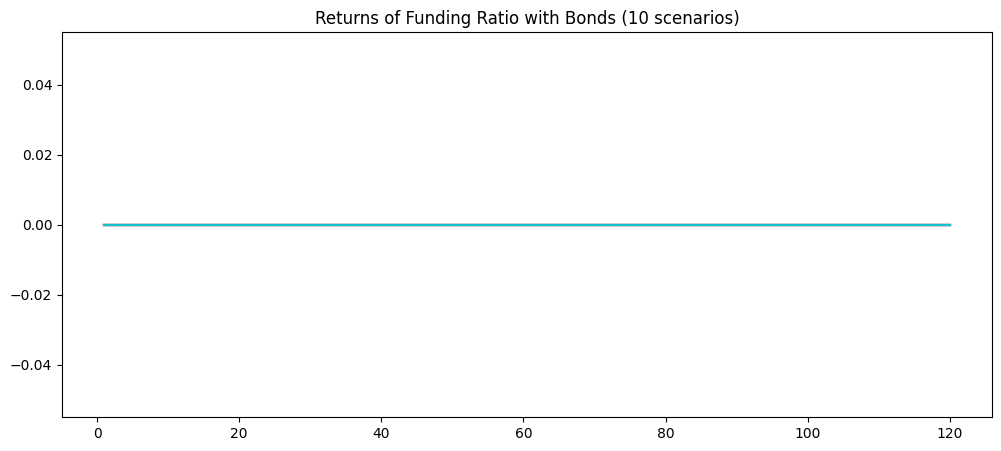

In [ ]:
(av_zc_bonds/liabilities).pct_change().plot(title='Returns of Funding Ratio with Bonds (10 scenarios)',legend=False,figsize=(12,5))

The result is clear, we got no risk. But again, the problem is that those bonds not always can be bought, most of the times they are in the market but it's difficult to get them.

Let's look at the final funding ratio.


##### **E15. Compute the final funding ratio using the CIR model**

In [ ]:
a_0= 0.75
#do 10000 scenarios with 0.03 initial r and b=0.03
rates, bond_prices=None
liabilities=bond_prices
zcbond_10=pd.Series(data=[1],index=[10])
zc_0=None #present value at 0.03 rate
n_bonds=a_0/zc_0
av_zc_bonds=None #asset value assuming we buy bonds
av_cash=a_0*(rates/12+1).cumprod() #acumulated returns

In [ ]:
#at the last point in time
tfr_cash=av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds=av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax=tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax,label="ZC Bonds", bins=100, legend=True, secondary_y=True)

The unique "convinent" assumption is that we have 0.75 million and 10 years to get the million. Repeat this time stating with 0.5

<Axes: >

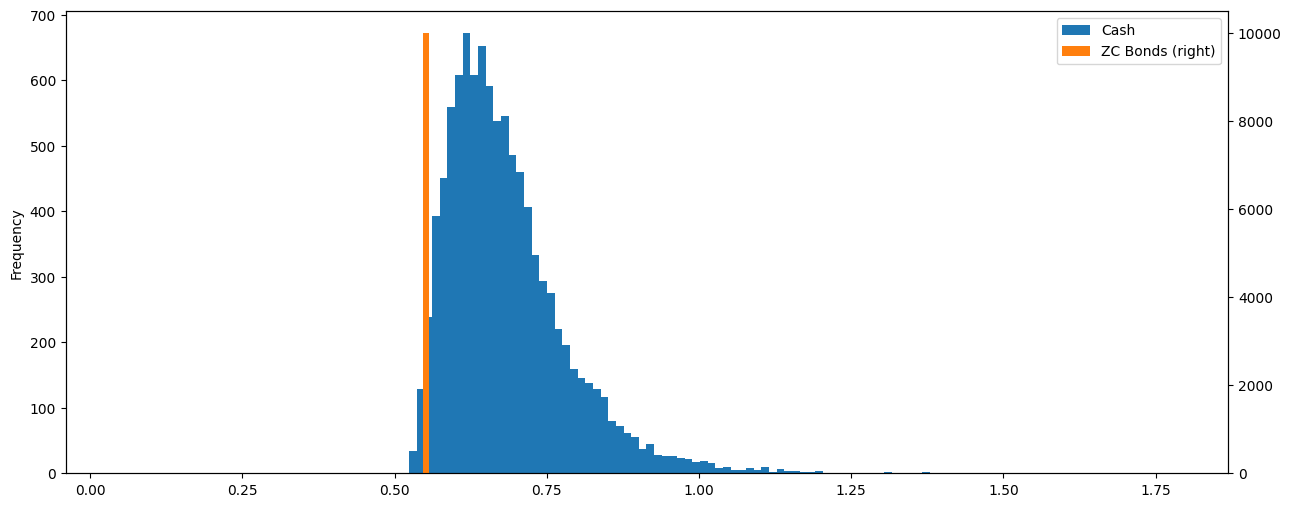

In [ ]:
a_0= None
rates, bond_prices=None
liabilities=None
zcbond_10=pd.Series(data=[1],index=[3])
zc_0=None
n_bonds=None
av_zc_bonds=None
av_cash=None

tfr_cash=av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds=av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax=tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax,label="ZC Bonds", bins=100, legend=True, secondary_y=True)

##### **R4. Assume that your liability is in Cash. Use the previous 5 scenarios you defined in R3 for the CIR modelling, and compute the funding ratio. Provide an analysis on how to use CIR to model liabilities and the funding ratio.**

## 5 GHP and Duration Matching

If we can find bonds that match our liabilities, then that's a good choice to immunize our libilities. If we don't find
 zero cuopon bonds, then we could use coupon bonds making a duration matching.


 The GHP (Goal-based Hedging Portfolio) and Duration Matching sections are often part of Liability-Driven Investment (LDI) strategies and are used to manage interest rate risk and ensure that investment portfolios can meet future obligations.

 The Goal-based Hedging Portfolio (GHP) is a strategy designed to reduce the risk of failing to meet specific investment goals, typically related to future liabilities. It focuses on constructing a portfolio that aligns closely with the cash flow needs or specific financial goals of the investor or institution. By aligning investments with specific goals, the GHP lowers the risk of being unable to meet obligations. GHP helps maintain a stable funding ratio by reducing exposure to market volatility, especially when cash flow needs are predictable and significant.

 On the other hand, duration Matching is a risk management technique used to align the interest rate sensitivity of assets and liabilities in a portfolio. The goal is to ensure that changes in interest rates have a similar effect on both assets and liabilities, minimizing interest rate risk.

 Both GHP and Duration Matching are focused on managing the risk associated with meeting future liabilities. While GHP focuses on creating a portfolio to achieve specific financial goals (like liability payments), Duration Matching ensures that the portfolio remains stable in the face of interest rate changes. Together, they provide a robust framework for institutions needing to manage assets in alignment with liabilities, reducing the risk of funding shortfalls and protecting the institution's financial stability.

Thus, for implementing GHP and duration matching first we'll use regular
 coupon payment to replace the leak of zero coupon bonds.

 ##### **E16. Implement a function to compute the returns of a bond. Then implement a fucntion to use these cashflows to compute the price of the bond.**

In [ ]:
def bond_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):
    """
    Returns a series of cash flows generated by a bond, indexed by coupon number.
    """
    n_coupons = round(None) #this is the coupons per year for the time to maturity
    coupon_amt = None  # Calculate the amount of each coupon
    coupon_times = np.arange(1, n_coupons + 1)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)
    cash_flows.iloc[-1] += None  # Add principal to the final payment
    return cash_flows

To get cash flows for a 3-year bond with a 3% coupon rate paid semiannually

In [ ]:
bond_cash_flows(3, 100, 0.03, 2)

,0
1,1.5
2,1.5
3,1.5
4,1.5
5,1.5
6,101.5


The bond_price function calculates the bond's price based on its cash flows and the discount rate. The price is the present value of the cash flows.

In [ ]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Price a bond based on bond parameters and discount rate.
    """
    cash_flows = None #obtain bonds cashflows
    #the pv of the cashflows, using a rate that is the monthly discount rate
    #which is the discount rate over the number of coupons per year
    return None #use pv function properly


Calculate the price of a 20-year bond with a 5% coupon rate and a 4% discount rate

In [ ]:
bond_price(20, 1000, 0.05, 2, 0.04)


1136.7773962036904

Now, assume we have the following rates and compute the bonds with these rates. How can you interpret the resulting plot?

In [ ]:
rates=np.linspace(0.01,.1,num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [ ]:
prices= [bond_price(10,1000,0.05,2,rate) for rate in rates]
pd.DataFrame(data=prices,index=rates).plot(title="Prices 10y Bond with different Interest Rate", legend=False)

The problem with these bonds is the intermediate cash flows. Remember that a bond with coupons are multiple
 zero coupon bonds together, and the problem is that some of those have a short time term.

In [ ]:
cf=bond_cash_flows(3,1000,.06,2)
cf

,0
1,30.0
2,30.0
3,30.0
4,30.0
5,30.0
6,1030.0


 We have cashflows, but it's better to get 30 today than 3 years in the future, right? Thus, how long are we waiting until we get the cashflows? We could compute the weighted average time.

In [ ]:
discounts=discount(cf.index,0.06/2)
discounts

Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
       0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
      dtype='float64')

 These are the discount factors. Now, we discounted values:

In [ ]:
dcf=None #the discounts time the cashflows
dcf

 This is the discounted values of the present values for the cashflows. Now, we can get the weights.

In [ ]:
weights=None #this is just the weights over the sum of weights
weights

,0
1,0.029126
2,0.028278
3,0.027454
4,0.026655
5,0.025878
6,0.862609


 Finally, we make a weighted average.

In [ ]:
(cf.index*weights).sum()

5.579707187194534

 Notice that this is something we know, called The Macaulay Duration. The Macaulay Duration of a bond is the weighted average time until cash flows are received. This measure helps to determine the sensitivity of bond prices to interest rate changes.The weighted average time we have to
 wait is 5.58 event though the maturity is 6. And as you know Macaculay Duration is related to the fisrt derivative of the price
 respect to the price, if it is greater, so is the change in the price with movements in the interest rates.
 And the Macaulay Duration of a zero coupon bond is the maturity, as we know.

 ##### **E17. Implement a function that computes the Macaulay Duration**

In [ ]:
def macaulay_duration(flows, discount_rate):
  """
   Computes the Macaulay Duration of a sequence of cashflows
   """
  discounted_flows=None
  weights=None
  return np.average(flows.index,weights=weights)

In [ ]:
macaulay_duration(bond_cash_flows(3,1000,0.06,2), 0.06/2)

5.579707187194534

Now, as we know one technique of immunization is to match the duration. Doing this, we could have the same
 sensitive to changes on interest rate for the liabilities and assets. Constructing a portfolio with this can give us
 protection, but just for parallel changes on interest rates. But the yield curve is more complex. By the time being,
 let's make duration matching.

If a zero-coupon bond does not match the maturity of our liabilities, we can use two bonds with different maturities to achieve the desired duration through weighted allocation.

In [ ]:
#define liabilities
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])

Now, we define bonds with different maturities and calculate their Macaulay durations.

In [ ]:
md_10 = macaulay_duration(bond_cash_flows(10, 1000, 0.05, 1), 0.04)
md_20 = macaulay_duration(bond_cash_flows(20, 1000, 0.05, 1), 0.04)
md_10, md_20

(8.190898824083233, 13.544718122145921)

 We know the durations of each bond, thus, to immunize this by matching durations we must
 compute the weights to buy for each bond so that the resulted duration is the one we need to match.

 Your task is to calculate the weight
$W$ of a short-duration asset (or bond) in a portfolio that also includes a long-duration asset. By correctly applying this weight, you'll create a duration-matched portfolio aligned with the target cash flows (e.g., future liabilities).

The first step is to calculate the Macaulay duration of the target cash flows $d_t$, which represent the liabilities or future cash obligations. Next, calculate the Macaulay durations of the short-duration asset $d_s$ and the long-duration asset $d_l$. Then,

$$W=\frac{d_l-d_t}{d_l-d_s}$$


By computing the appropriate weights, you’ll create a portfolio that mirrors the duration of your liabilities, effectively hedging against interest rate changes. This process stabilizes the funding ratio and ensures that fluctuations in interest rates won’t cause large mismatches in the value of your assets and liabilities.




##### **E18.Implement the match duration function to determine the weights of each bond required to match the liability duration**



In [ ]:
def match_duration(cf_t, cf_s, cf_l, discount_rate):
    """
    Returns the weight W in cf_s to match duration for target cash flows cf_t.
    """
    d_t = None  # target
    d_s = None  # short bond
    d_l = macaulay_duration(cf_l, discount_rate)  # long bond
    return None #weights computation


In [ ]:
#assume the short bond is for a period of 10, and the long is for 20
short_bond = None
long_bond = None(20, 1000, 0.05, 1)
w_s = None #weights to match durations for the short bond
w_l = 1 - w_s #weight for the long is just the remaining weight
print(w_s)
print(w_l)

0.48263092069478974
0.5173690793052103


Given the calculated weights, construct the portfolio by allocating funds proportionally to each bond.

In [ ]:
price_short = bond_price(10, 1000, 0.05, 1, 0.04)
price_long = bond_price(20, 1000, 0.05, 1, 0.04)
a_0 = None  # Initial assets value, assume 130000

portfolio_flows = pd.concat([a_0 * w_s * short_bond / price_short, a_0 * w_l * long_bond / price_long])


In [ ]:
macaulay_duration(portfolio_flows,0.04)

10.960799385088393

 Now, let's compute the funding ratio

In [ ]:
def funding_ratio (assets,liabilities,r_a,r_l):
  """
    Computes the funding ratio of some given liabiities and interest rate.
    """
  return pv(assets,r_a)/pv(liabilities,r_l)

In [ ]:
funding_ratio(portfolio_flows,liabilities,0.04,0.04)

0.9998760012192478

 So, we're pretty funded. The question now is what happens to the funding ratio when there are changes on interest rates and a bunch of cashflows.

 ##### **R5. Explain GHP and duration matching in liability driven investing. To assess the sensitivity of the funding ratio to changes in interest rates, calculate the funding ratios for a range of rates. Consider 20 rates between 0 and 0.1 using linspace(), consider your previous long and short bonds and prices. Then, compute the funding ratio for the long bond using the 20 rates. Compute the funding ratio for the short bond with the rates. Finally, use the previous portfolio_flows and liabilities to compute the funding ratio with the rates. Plot these 3 series and explain what you see. Assess the sensitivity of the funding ratio to changes in interest rates.**

## 6 Simulation of Prices of Coupon Bonds using CIR

We have seen how to work with bonds, and again, bonds depend on the interest rate. Therefore, we can again use CIR to model bond prices!

First, let's improve our discount and pv function by doing vectorization.

In [ ]:
def discount (t,r):
  """
    Compute the price of a pure discounte bond that pays a dollar at time t, g
  iven an interest rate r. Returns a |t|x|r| series or data frame r can be a flo
  at, series or data frame
    returns a dataframe indexed by t
    """
  discounts=pd.DataFrame([(r+1)**-i for i in t])
  discounts.index=t
  return (discounts)

def pv(flows,r):
  """
    Computes PV of a set of liabilities
    flows is indexed by the time and amounts
    r can be a scalar, a series, or a dataframe with the number of rows matchi
  ng the num of rows in flows
    """
  dates= flows.index
  discounts= discount(dates,r)
  return discounts.multiply(flows, axis='rows').sum()

In [ ]:
bond_price(5,100,0.05,12,0.03)

,0
0,109.275393


In [ ]:
#simulate rates and zc prices using CIR
rates, zc_prices=None(10,500,b=0.03,r_0=0.03)

In [ ]:
#bond prices
bond_price(5,100,0.05,12,rates.iloc[0][[1,2,3]])

In [ ]:
bond_price(5,100,0.05,12,rates.iloc[1][[1,2,3]]) #time 1

In [ ]:
rates[[1,2,3]].head()

 And let's improve the bond_price function

The bond_price function calculates the price of a bond that pays coupons until maturity, with the principal returned at maturity. The function can handle a discount_rate input as a DataFrame to simulate varying rates over time

In [ ]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Computes the price of a bond that pays coupons until maturity.
    """
    if isinstance(discount_rate, pd.DataFrame):
        pricing_dates = discount_rate.index
        prices = pd.DataFrame(index=pricing_dates, columns=discount_rate.columns)
        for t in pricing_dates:
            prices.loc[t] = bond_price(maturity - t / coupons_per_year, principal, coupon_rate, coupons_per_year, discount_rate.loc[t])
        return prices
    else:
        if maturity <= 0:
            return principal + principal * coupon_rate / coupons_per_year
        cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
        return pv(cash_flows, discount_rate / coupons_per_year)


Using the simulated interest rates, we calculate bond prices over time with the bond_price function. The price evolution shows how interest rate fluctuations affect bond prices.

In [ ]:
bond_price(10,100,0.05,12,rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

To evaluate bond performance, we calculate the annualized bond returns based on percentage changes in bond prices. This reveals how bond returns respond to interest rate changes

In [ ]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of periodic returns.

    Parameters:
    - r: pd.Series or pd.DataFrame of returns
    - periods_per_year: Number of compounding periods per year (e.g., 12 for monthly, 252 for daily)

    Returns:
    - Annualized return
    """
    compounded_growth = None #cummulative returns
    n_periods = None #lenght of compounded_growth
    return compounded_growth ** (periods_per_year / n_periods) - 1


In [ ]:
prices=bond_price(10,100,0.05,12,rates[[1,2,3,4,5]])
br = prices.pct_change().dropna()
annualize_rets(br, 12)

 why are they negative? The reason is that we are looked at the price return, but we're interested in the total
 return, which is the value considering the coupons (dividends/payments).

 ##### **E19. Compute the bond total returns**

In [ ]:
def bond_total_return(monthly_prices, principal, coupon_rate, coupons_per_year):
    """
    Computes the total return of a bond, including coupon payments.

    Parameters:
    - monthly_prices: DataFrame of monthly bond prices (each column is a different scenario)
    - principal: Bond principal (face value)
    - coupon_rate: Annual coupon rate of the bond
    - coupons_per_year: Number of coupon payments per year

    Returns:
    - DataFrame of total returns, accounting for both price changes and coupon payments.
    """
    # Initialize DataFrame for coupons, matching the structure of monthly_prices
    coupons = pd.DataFrame(0, index=monthly_prices.index, columns=monthly_prices.columns)
    t_max = monthly_prices.index.max()

    # Define payment dates (in terms of months) for the coupons
    pay_dates = np.linspace(12 / coupons_per_year, t_max, int(coupons_per_year * t_max / 12), dtype=int)

    # Populate coupon payments at the defined payment dates
    coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year

    # Calculate total returns by adding the coupon payments to the bond price (monthly)
    total_returns = (None) / monthly_prices.shift() - 1

    # Drop the initial row since it has no previous price for return calculation
    return total_returns.dropna()


In [ ]:
p=bond_price(10,100,0.05,12,rates[[1,2,3,4,]])
btr=bond_total_return(p,100,0.05,12)
annualize_rets(btr,12)

 As we can see, bond prices change over time. The dynamics of interest rates is affecting us

In [ ]:
price_10=bond_price(10,100,0.05,12,rates)
price_10[[1,2,3]].tail()

 As you can see the bonds have converged to their final payment. Now, let's do the same but for 30y as you
 remember we have generated rates for 10y, so the prices are not going to converge as we still have 20 years of
 variation.

In [ ]:
price_30=None
price_30[[1,2,3]].tail()

So, bonds tend to be tought as safe,but they are not, this is clear when the maturity is long.
 Let's make a portfolio with the two bonds. Use a 60/40 combination using the 10 and 30 year bonds

In [ ]:
rets_30=bond_total_return(price_30,100,0.05,12)
rets_10=bond_total_return(price_10,100,0.05,12)
rets_bonds=None
#The assumption is we are rebalancing 60/40 at the end of each month. This is
#because if we don't rebalance, because of the changes of prices, at the end
#of a month we are not 60/40 of the initial value. So, you should recompute the
#weights.

In [ ]:
mean_rets_bonds=rets_bonds.mean(axis='columns') #series for each column
summary_stats(pd.DataFrame(mean_rets_bonds))

Obviously, it has no drawdowns as it is composed.

Awesome, so you have used CIR to model bonds, rets_bonds. But apart from bonds, portfolios are often constructed using equities. Now, you know that you can use GBM to model equities. Therefore, we can now combine CIR for bonds with GBM for equities to simulate a portfolio that combines both!

##### **R6. Explain how CIR is used for modelling coupon bonds, and give empirical evidence that bonds are not safe at all using a 60/40 composition of bonds (you can use your previous results). Then, use GBM to simulate equities for 10 years, in 500 scenarios with a mean of 0.07 and std of 0.15. Once you have the simulation of equities, convert them to returns, i.e. percentual changes (if you use pct_change() remember to use dropna() to delete the first na element). Once you have the returns of the equities combine them with the previous returns of bonds, rets_bonds, in a portfolio that has a 0.7/0.3 split (equities/bonds). Compute the mean of the 70/30 portfolio returns. Compute the risk-return statistics and analyze the results. Compare them with the bonds returns alone.**

 With this, you have combined a portfolio of stocks and bonds in a 70/30 mix. The question now is: How do we properly choose these weights? The goal now
 is that we have assets, liabilities, and we have to find out the weights to mix them properly, this is again what we've seen as the
 allocation problem. What is the correct combination of stocks and bonds?


## 7 Naive Risk Budgeting Strategies between the PSP and GHP

The next step is to find out how to combine portfolios that seek for performance (take risk) with portfolios that protect goals (liabilities).

As always with these mixing problems, let's begin by testing different mixings of the portfolios and see what would have happened. Thus, let's code back testor to test the proficiency of different mixes of two portfolio.

The following function bactest a mix of sets of returns.

In [ ]:
#allocator is a free function to allocate that the user gives. **kwargs allows us to take the function and whichever variable within.
def bt_mix(r1,r2, allocator, **kwargs):
    """
    Runs a back test (simulation) of allocating between a two sets of returns
    r1 and r2 are TxN DataFrames or returns where T is the time step and N is the number of scenarios.
    allocator is a function that takes two set of returns and allocator specific parameters, and produces
    an allocation tot the first portfolio (the rest of the money is invested in the GHP) as a T x 1 DataFrame
    Returns a TxN DataFrame of the resulting N portfolio scenarios.
    """
    if not r1.shape== r2.shape:
        raise ValueError("r1 and r2 need to have the same shape")
    weights=allocator(r1,r2, **kwargs) #The allocator takes r1, r2 and a bunch of other variables
    if not weights.shape==r1.shape:
        raise ValueError("Allocator results not matching r1 shape")
    r_mix=weights*r1+(1-weights)*r2
    return r_mix

The following function produces a time series over T steps of allocation between the PSP and the GHP across N scenarios.

In [ ]:
def fixedmix_allocator(r1,r2, w1, **kwargs):
    """
    Produces a time series over T steps of allocation between the PSP
    and the GHP across N scenarios.
    PSP and GHP are TxN DataFrames that represent the returns of the PSP and GHP such that:
    each column is a scenario
    each row is the price for a timestep
    returns an TxN DataFrame of PSP Weights
    """
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)

The following function is the same as before to compute the total bond return.

In [ ]:
def bond_total_return(monthly_prices, principal, coupon_rate,coupons_per_year):
    """
    Computes the total return of a bond on monthly bond prices and coupon payments
    Assumes that dividends (coupons) are paid out at the end of the period (e.g. end of 3 months for quaterly div) and that dividens are reinvested in the bond
    """
    coupons=pd.DataFrame(data=0, index=monthly_prices.index, columns=monthly_prices.columns)
    t_max=monthly_prices.index.max()
    pay_date=np.linspace(12/coupons_per_year,t_max, int(coupons_per_year*t_max/12), dtype=int)
    coupons.iloc[pay_date]=principal*coupon_rate/coupons_per_year
    total_returns=(monthly_prices+coupons)/monthly_prices.shift()-1
    return total_returns.dropna()

Now, we obtain the returns of bonds.

In [ ]:
#Use the appropriate functions to simulate the expected results
rates, zc_prices=None #use cir for 10 years with 500 scenarios and b=0.03,r_0=0.03
price_10=bond_price(10,100,0.05,12,rates)
price_30=None #bond prices
rets_10=bond_total_return(price_10,100,0.05,12)
rets_30=None #bond returns

#use the backtester allocator with an allocation of 0.6 for the 10 year bond
rets_bonds=None(None,rets_30,allocator=fixedmix_allocator, w1=None)

In [ ]:
mean_rets_bonds=rets_bonds.mean(axis="columns")
summary_stats(pd.DataFrame(mean_rets_bonds))

Again, we are going to generate equity returns and bond returns and mix them. Same as before.

In [ ]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07,sigma=0.15,steps_per_year=12, s_0=100.0,prices=True):
    """
    Evolution of a Stock Price using GBM
    """
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)

    if prices:
        rets_plus_1=np.random.normal(loc=1+mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps+1,n_scenarios)) #loc is the mean, and scale the std
        rets_plus_1[0]=1
        prices=s_0*pd.DataFrame(rets_plus_1).cumprod()
        return prices
    else:
        rets=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps+1,n_scenarios))
        return rets

In [ ]:
price_eq=gbm(n_years=10,n_scenarios=500,mu=0.07,sigma=0.15)
rets_eq=price_eq.pct_change().dropna()
rets_zc=zc_prices.pct_change().dropna()

##### **E21. Use the backtester mixer to mix the returns of the equities and bonds using the fixedmixallocator with a weight w1 of 0.7. This returns a 70/30 portfolio. Then compute the mean of these returns using mean(axis=1). Apply the summary statistics. Notice that this first approach generates a time series of the average results and then computes the statistics. Now, take a different approach, first compute the statistics of the returns of the 70/30 and then take the average using mean(). Compare the results of the two approaches. Now, repeat the same using an allocation og 60/40. Compare the results, which annualized return is greater? What are your insights about the results?**





Now, we look at the terminal values. The following function returns the final values of a dollar at the end of the return period for each scenario
    

In [ ]:
def terminal_values(rets):
    """
    Returns the final values of a dollar at the end of the return period for each scenario
    """
    return (rets+1).prod()

In [ ]:
def terminal_stats(rets, floor=0.8,cap=np.inf,name="Stats"):
    """
    Produce Summary Statistics on the terminal value per invested dollar across a range of N scenarios
    rets is a TxN DataFrame of returns, where T is the time_step (we assume rets is sorted by time)
    Returns a 1 column DataFrame of Summary Stats indexed by the stat name
    """
    terminal_wealth=None #the cumulative returns
    breach=None #check if the terminal_wealth was less than the floor
    reach=terminal_wealth>=cap
    p_breach=breach.mean() if breach.sum()>0 else np.nan #probability of breach
    p_reach=breach.mean() if None else np.nan #arrival probability: just computed if the total reach times is greater than 0

    e_short=(floor-terminal_wealth[breach]).mean() if breach.sum()>0 else np.nan #average of all the cases we were below the floor
    #this is the same but using the cap instead the floor... explain why
    e_surplus=None
    sum_stats= pd.DataFrame.from_dict({
        "mean":terminal_wealth.mean(),
        "std": terminal_wealth.std(),
        "p_breach": p_breach,
        "e_short":e_short,
        "p_reach":p_reach,
        "e_surplus":e_surplus}, orient="index", columns=[name])
    return sum_stats

##### **E22/R7. Compute the terminal stats for the returns of the bonds, for the equities, for the 70/30 portfolio, and for the 60/40 portfolio. Import seaborn and use plt.figure() and sns.distplot(terminal values for equities,color="red",label="100% Equities"), distplot(terminal values for bonds,color="blue",label="100% Bonds"), etc.Analyze the results. Notice that you will obtain some NaNs, why? Interpret.**

The question is how could we get to cover the liabilities not matter what happen?

The resulting plot from the exercise shows that there's a positive probability of getting below 0.8 (x-axis), but that is what we would like to get rid off.

We had the case of being very risky (100% eq) or being very conservative. And then we tried to fix a mixture of both cases 70/30 in order to improve our performance but keeping a protection. What about try to going more for equity and as we get to the end point of our period of time going more and more into bonds?

## 8 Glide Paths for Allocation

Another type of allocator is a Glide Path Allocator. This is a target-date fund glide path strategy, where an investment portfolio gradually shifts its allocation from higher-risk to lower-risk investments as the target date approaches. This is commonly used in retirement funds that reduce exposure to risky assets as the target date (retirement date) approaches.

In [ ]:
def glidepath_allocator(r1,r2,start_glide=1,end_glide=0):
    """
    Simulates a Target-Date-Fund Style gradual move from r1 to r2.
    """
    n_points=r1.shape[0]
    n_col=r1.shape[1]
    path=pd.Series(data=np.linspace(start_glide,end_glide, num=n_points))
    paths= pd.concat([path]*n_col, axis=1) #we replicate our list// we concatenate n_col copies of path
    paths.index=r1.index
    paths.columns=r1.columns
    return paths

**E23/R8. Add to your previous analysis the terminal state of an allocation of 80/20 using a Glide Allocator with start_glide=.8,end_glide=.2. Interpret the results. What is the results for the probability of breach?**

This approach has good results, but it doensn't really solved the problem as we have positive probability of a breach.

## 9 Dynamic Risk Budgeting

The porpuse is now to use all the stuff we have made to cronstruct real world allocators with more sophisticated techniques. Assume 5000 scenarios with 10 years, b=0.03, starting r_0 of 0.03 and std of 0.02.

In [ ]:
n_scenarios=None
#use CIR to simulate rates and zc prices
rates, zc_prices= None
#Use GBM to simulate equities for 10 years with n_scenarios, mean 0.07 and std 0.15 for the normal variable
price_eq=None

In [ ]:
#you have simulated prices, obtain now the returns
rets_eq=None.pct_change().dropna() #equities returns
rets_zc=None #zc returns

#use the mix backtester to mix them in a equities/bonds of 70/30 using the fixedmix allocator
rets_7030b=None

#the terminal state results
pd.concat([
terminal_stats(rets_zc,name="ZC", floor=0.75),
terminal_stats(rets_eq,name="Eq", floor=0.75),
terminal_stats(rets_7030b,name="70/30", floor=0.75)
],axis=1).round(2)

We couldn't solve the problem of the positive probabity of breach. The reason is that there are breaches even when we have a floor, the allocator is "blind" respect to that floor, and it is not considering it. The same happened with the glide allocator. So, now we'll consider it. And we already know how to do portfolios that consider a downside risk protection right? Yes, you know the CPPI strategy. Thus, you can implement a CPPI-style allocation strategy that introduces a risk budgeting in terms of floor and cushion, the same we did with CPPI!

Even more, another technique is not to determine the risk budget according to how much we need to have at the end but instead according to how much we don't want to lose. This means that we want to make sure our drawdown is not larger than a certain level at any point of time. This is a very popular technique in practice. So, we don't have any more just a floor constraint, but a drawdown constraint. And this is just the extension of CPPI we did at the begining!

So, the time has come to combine all you have studied into one single strategy.


##### **E23/R8. Complete the following functions and code to create an allocation strategy between PSP and GHP using a CPPI-style dynamic risk budgeting. To the previous computtation of terminal states of ZC bonds, equities, and 70/30, add the terminal state for the floor allocation using a floor of 75%.Analyze the results. What happens to the probability of breach? Is this good or bad?**

In [ ]:
#we use the zero coupon prices to discount the value of the floor,
#so we are using them as discount factor for the dfferent time periods.

As you can notice, the process is very similar to CPPI.

def floor_allocator(psp_r, ghp_r, floor, zc_prices, m=3):
    """
    Allocation between PSP and GHP with the goal to provide exposure to the upside
    of the PSP without going violating the floor.
    Uses a CPPI-style dynamic risk budgeting algorithm byinvesting a multiple of the
    cushion in the PSP.
    Return a DataFrame with the same shape as the psp/ghp epresenting the weights in the PSP.
    """
    if zc_prices.shape != psp_r.shape:
        raise ValueError ("PSP and ZC Prices must have the same shape")
    n_steps, n_scenarios= psp_r.shape
    account_value=np.repeat(1,n_scenarios) #we consider $1
    floor_value=np.repeat(1,n_scenarios)
    w_history=pd.DataFrame(index=psp_r.index,columns=psp_r.columns)

    for step in range(n_steps):
        floor_value=floor*zc_prices.iloc[step] #PV of the Floor assuming today's rates and flat YC
        cushion=None
        #weight for psp, which is the multiplier times the cushion
        psp_w=(Nonen).clip(0,1) #same as applying min and max// clip checks that every value in an array is in a range
        ghp_w=1-psp_w #weight for ghp
        #allocation to psp and ghp
        psp_alloc=None
        ghp_alloc=None
        #recompute the new account value at the end of this step using the new allocations
        account_value=None

        #save the weight of psp
        w_history.iloc[step]=None
    return w_history

##### **E24/R9. And again, we can extend this to introduce a drawdown constrain. Do this extension and apply it using a max drowdawn of 0.25, then compute the terminal state and compare the output with the previous results.**

Note: Notice that for implementing the Drawdown constraint we can't use bonds anymore (even zc bonds) as we nee something with a very very short duration, the simplest example is cash, as it's duration is practically zero

In [ ]:
def drawdown_allocator(psp_r,ghp_r,maxdd,m=3):
    """
    Allocate between PSP and GHP with the goal to provide exposure to the upside of the
    PSP without going violating the floor.
    Uses a CPPI-style dynamic risk budgeting algorithm by investing
    a multiple of the cushion  in the PSP.
    Returns a DataFrame withthe same shape as the psp/ghp representing the weights in the PSP
    """
    n_steps,n_scenarios=None
    account_value=None
    floor_value=None
    peak_value=None #do the same as for floor and account_value
    w_history=pd.DataFrame(index=psp_r.index,columns=psp_r.columns)

    for step in range(n_steps):
        floor_value=(1-maxdd)*None ### floor is based on prev peak_value
        cushion=None
        #weights
        psp_w=(None).clip(0,1)
        ghp_w=None
        #allocations
        psp_alloc=None
        ghp_alloc=None

        #recompute the new account value and prev peak at the end of this step
        account_value=None
        #the new peak value is the maximum between the previous peak value and the account value
        peak_value=None

        #save the psp weight history
        w_history.iloc[step]=None
    return w_history

In [ ]:
#example: max dd=25%
cashrate=0.02
monthly_cashreturn=(1+cashrate)**(1/12)-1
#we need the returns of the safe asset
rets_cash=pd.DataFrame(data=monthly_cashreturn,index=rets_eq.index,columns=rets_eq.columns)
#returns from max drawdowns
rets_maxdd25=bt_mix(rets_eq,rets_cash,allocator=drawdown_allocator,maxdd=0.25)

After you have completed all previous exercises, you can run the following to compare the terminal values of the different investments:

In [ ]:
#Looking at terminal values
tv_eq=terminal_values(rets_eq)
tv_zc=terminal_values(rets_zc)
tv_7030b=terminal_values(rets_7030b)
tv_floor75=terminal_values(rets_floor75)
tv_maxdd25=terminal_values(rets_maxdd25)

<ipython-input-271-e77cf61345e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_eq,color="red",label="100% Equities", bins=100)
<ipython-input-271-e77cf61345e6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
<ipython-input-

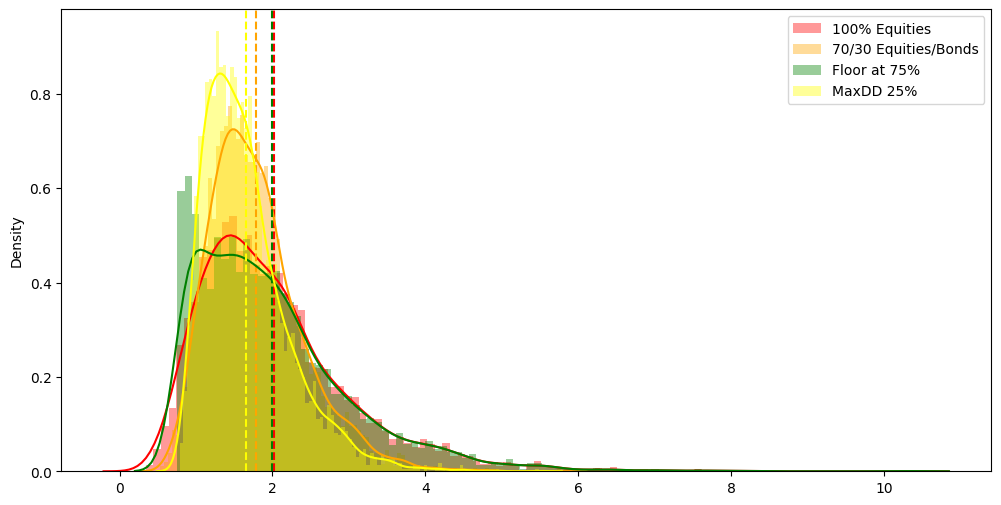

In [ ]:
#PLOT:
plt.figure(figsize=(12,6))
sns.distplot(tv_eq,color="red",label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), ls="--", color="red")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), ls="--", color="orange")
sns.distplot(tv_floor75,color="green",label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), ls="--", color="green")
sns.distplot(tv_maxdd25, color="yellow",label="MaxDD 25%", bins=100)
plt.axvline(tv_maxdd25.mean(),ls="--", color="yellow")
plt.legend();

Equities have the max average return, but notice that it is also the one that has the most values at the rights. The floor at 75% has a very similar shape to Equities and the cost of opportunity is very small, it has an expected value good but it eliminates points below 75%.

All this we have done was made based on simulated data, but there's no reason to not use real data, as the methods and algorithms are the same.

##### **E25/R10. Finally, we are going to compare the returns produced with the 0.25 max drawdown allocation LDI strategy agains the performance of the market. For this, we need to compute the historical drawdowns, we can use for this porpouse the market returns we obtained at the begining of the coursework. Compute the drawdowns of the historical market returns, apply the LDI allocation strategy using the max drawdown constraint. Analyze the drawdowns experienced using the historical returns produced by the mentioned LDI strategy. Analyze the results. Give a wrap-up that explains how we went in this coursework from CPPI and asset simulation to dynamic asset allocation strategies with LDI. Give a general conclusion for the coursework.**

In [ ]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns,
        returns a DataFrame with columns for
        the Wealth index,
        the previous peaks, and
        the percentage drawdowns
    """
    #assume you start with 1000 and compute the walth index of commulative returns
    wealth_index=None
    previous_peaks=wealth_index.cummax()
    #compute the drawdowns
    drawdowns=None
    return pd.DataFrame({"Wealth":wealth_index,
                        "Previous Peak":previous_peaks,
                        "Drawdown":drawdowns})

In [ ]:
#DRAWDOWNS OF HISTORICAL MARKET RETURNS
#Consider the total market index we constructed, now from 1990 onwards
rets_tmi=total_market_return[None]
dd_tmi=None #obtain the drawdowns of the market returns
ax=dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod")
dd_tmi["Previous Peak"].plot(ax=ax,ls=":",color="red")

In [ ]:
#PERFORM THE MAX DD LDI ALLOCATION STRATEGY
#compute the drawdown strategy using cash
cashrate=0.03
monthly_cashreturn=None #monthly cash returns with the defined cashrate
rets_cash=pd.DataFrame(data=monthly_cashreturn,index=rets_tmi.index,columns=[0]) #1 column dataframe

#obtain the maxdd25 returns using backtester mixer with the returns of the cash,
#the drawdown allocator, a multiplier of 5, and max drawdown of 0.25
rets_maxdd25=None(pd.DataFrame(rets_tmi),None,allocator=None,maxdd=None,m=None)
dd_25=drawdown(rets_maxdd25[0])


In [ ]:
#Plot and analyze